From https://examples.holoviz.org/gallery/attractors/attractors.html

An attractor is a set of values to which a numerical system tends to evolve. An attractor is called a strange attractor if the resulting pattern has a fractal structure. This notebook shows how to calculate and plot two-dimensional attractors of a variety of types, using code and parameters primarily from Lázaro Alonso, François Pacull, Jason Rampe, Paul Bourke, and James A. Bednar.

URL of this Colab notebook: https://colab.research.google.com/drive/1jrPKSsN5TrCNlIFIKKj8y2gxsZqn2zZy

In [1]:
!pip install datashader -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.3 MB/s eta 0:00:00


In [2]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from math import sin, cos, sqrt, fabs

@jit(nopython=True)
def Clifford(x, y, a, b, c, d, *o):
    return sin(a * y) + c * cos(a * x), \
           sin(b * x) + d * cos(b * y)

In [3]:
n=10000000

@jit(nopython=True)
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y

def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))

In [4]:
%%time
df = trajectory(Clifford, 0, 0, -1.3, -1.3, -1.8, -1.9)

CPU times: user 3.08 s, sys: 371 ms, total: 3.45 s
Wall time: 6.18 s


In [5]:
df.tail()

,x,y
9999995,1.857884,1.395837
9999996,0.375264,-0.205512
9999997,-1.326024,-2.301316
9999998,0.423711,2.867012
9999999,-0.981134,1.060115


In [6]:
%%time

cvs = ds.Canvas(plot_width = 700, plot_height = 700)
agg = cvs.points(df, 'x', 'y')
print(agg.values[190:195,190:195],"\n")

[[ 37  41  26  24  24]
 [ 28  30  42  27  26]
 [111  53  29  37  28]
 [145 177 113  63  44]
 [ 78  94 136 140  96]] 

CPU times: user 1.39 s, sys: 11.7 ms, total: 1.4 s
Wall time: 2.39 s


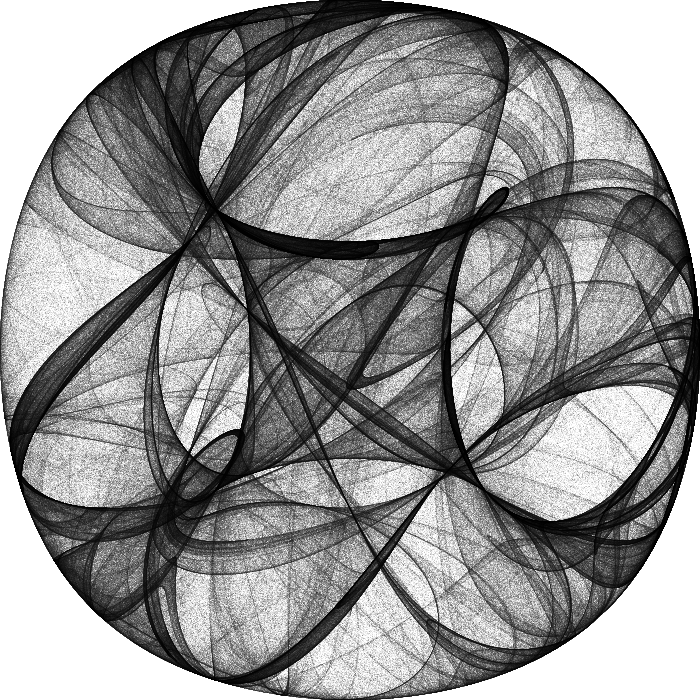

In [7]:
ds.transfer_functions.Image.border=0

tf.shade(agg, cmap = ["white", "black"])